# Fiji measurement analyzer
This notebook analyzes data from the fiji - counting and measuring macro.
First analyze your pictures with the macro and put the resulting .csv files in the CSVdump folder. Then run this program box by box.

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Fri May 25 11:18:02 2018

@author: Felix.Flomm
"""
#Analyzer for Fiji measurement Macro output
#-----import stuff
import os
import pandas as pd
import Tkinter
from ipywidgets import widgets, interact
from IPython.display import display
import matplotlib.pyplot as plt
from itertools import combinations
%matplotlib inline 
#-----
#----Methods Part
def positiveanalyzer(value, threshold):
    #value = value*100/255
    if value>threshold:
        return True
    else:
        return False

#-----
style = {'description_width': 'initial'}
exname = widgets.Text(
        value='',
        placeholder='Enter Experiment Name',
        description='Experiment name:',
        disabled=False,
        style=style
        )
channel1 = widgets.Text(
        value='',
        placeholder='Enter Channelname',
        description='Channel 1:',
        disabled=False,
        style=style
        )
thresharray={}
channel2 = widgets.Text(
        value='',
        placeholder='Enter Channelname',
        description='Channel 2:',
        disabled=False,
        style=style
        )
channel3 = widgets.Text(
        value='',
        placeholder='Enter Channelname',
        description='Channel 3:',
        disabled=False,
        style=style
        )
channel4 = widgets.Text(
        value='',
        placeholder='Enter Channelname',
        description='Channel 4:',
        disabled=False,
        style=style
        )
thresharray['Channel 1']=widgets.IntText(
    value=0,
    description='Threshold Ch1:',
    disabled=False,
    style=style
)
thresharray["Channel 2"]=widgets.IntText(
    value=0,
    description='Threshold Ch2:',
    disabled=False,
    style=style
)
thresharray["Channel 3"]=widgets.IntText(
    value=0,
    description='Threshold Ch3:',
    disabled=False,
    style=style
)
display(exname)
display(channel1)
display(thresharray["Channel 1"])
display(channel2)
display(thresharray["Channel 2"])
display(channel3)
display(thresharray["Channel 3"])
#display(channel4)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

Enter above the experiment name, channel names and the threshold above which the signal value should be considered as a positive signal. The outputfiles will later be saved in a seperate folder with the experiments in the "Results" directory. For the channel names strictly adhere to the names you gave the channel in the Fiji macro, otherwise the .csv files will not be recognized. For the threshold look at the lists or the signal in the pictures to get a good idea which signal can be considered signal or noise. Afterwards select the next box and press "run cell" to continue

In [4]:
if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(workbookDir)
inputpath = workbookDir+'\\CSVdump\\'
outputpath = workbookDir+'\\Results\\'+exname.value+'\\'
if not os.path.exists(outputpath):
    os.mkdir(outputpath)
#print os.listdir(inputpath)
Channelarray={}
if channel1.value != '':
    Channelarray["Channel {0}".format(1)]=channel1.value
if channel2.value != '':
    Channelarray["Channel {0}".format(2)]=channel2.value
if channel3.value != '':
    Channelarray["Channel {0}".format(3)]=channel3.value
#if channel4.value != '':
#    Channelarray["Channel {0}".format(4)]=channel4.value
frames={}
for i in range(len(Channelarray)):
    col_names =  ['','Area','Mean']
    CHList  = pd.DataFrame(columns = col_names)
    taglength = len(Channelarray['Channel '+str(i+1)])+4
    for file in os.listdir(inputpath):
        #switch to Inputfolder
        os.chdir(inputpath)
        if file[-taglength:] == Channelarray['Channel '+str(i+1)]+'.csv':
            print Channelarray['Channel '+str(i+1)]+'.csv found'
            #Read the Table
            inputtable = pd.read_csv(file, header = 0)
            #concatenate the tables
            inputframe = [CHList,inputtable]
            CHList = pd.concat(inputframe,ignore_index=True)
        frames[i+1] = CHList
#print frames
print Channelarray

Lifeact.csv found
pp150.csv found
IE1.csv found
{'Channel 1': u'Lifeact', 'Channel 2': u'pp150', 'Channel 3': u'IE1'}


Above you see the channels you entered and for each file the program found for that channel it will give you the message "[Channelname].csv found". It will also concatenate the files of each channel to one big list according to the order they are in the folder.

# Plotting Part I
Here you can see the histograms for your channels.

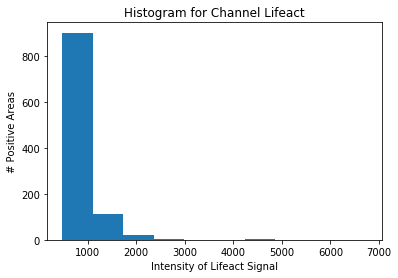

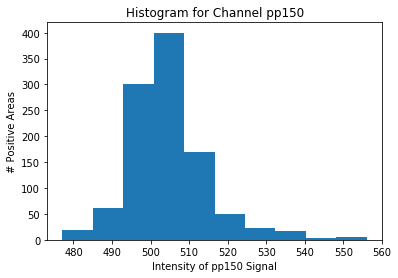

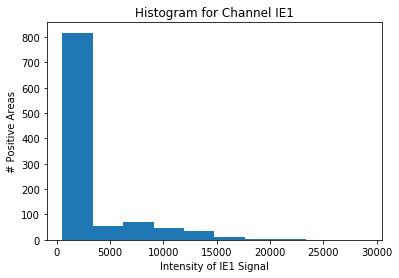

In [10]:
#fig, axs = plt.subplots(1,2,3,4)
for i in range(len(frames)):
    Channelhistogram = plt.hist(frames[i+1]['Mean'][frames[i+1]['Mean']!= 0])
    plt.title('Histogram for Channel '+Channelarray['Channel '+str(i+1)])
    plt.xlabel('Intensity of '+Channelarray['Channel '+str(i+1)]+' Signal')
    plt.ylabel('# Positive Areas')
    figname=outputpath+'Histogram for Channel '+Channelarray['Channel '+str(i+1)] \
        +'.png'
    plt.savefig(figname, bbox_inches='tight', dpi=300)
    plt.show(Channelhistogram)

Now the program will analyze the list according to the parameters you set.

In [11]:
Chcounter = {}
if len(frames) == 1:
    groups = ['Total Areas', Channelarray['Channel 1']+' single positive']
if len(frames) == 2:
    groups = ['Total Areas', Channelarray['Channel 1']+' positive', \
              Channelarray['Channel 2']+' positive', \
              Channelarray['Channel 1']+' + '+Channelarray['Channel 2']+\
              ' positive']
if len(frames) == 3:
    groups = ['Total Areas', Channelarray['Channel 1']+' positive', \
              Channelarray['Channel 2']+' positive', Channelarray['Channel 3']+\
              ' positive', \
              Channelarray['Channel 1']+' + '+Channelarray['Channel 2']+\
              ' positive', \
              Channelarray['Channel 1']+' + '+Channelarray['Channel 3']+\
              ' positive', \
              Channelarray['Channel 2']+' + '+Channelarray['Channel 3']+\
              ' positive', \
              Channelarray['Channel 1']+' + '+Channelarray['Channel 2']+\
              ' + '+Channelarray['Channel 3']+' positive']
#if len(frames) == 4:
#    groups = ['Total Cells', Channelarray['Channel 1']+' positive']
Chcounter=pd.DataFrame(0,index=range(0,1), columns=groups)
countframe = pd.DataFrame(index=range(0,len(frames[1].index)),\
                          columns=['1','2','3','4','5'])
position=0
for a in range(len(frames)):
    combos = combinations(range(len(frames)), a+1)
    for b in list(combinations(range(len(frames)), a+1)):
        position=position+1
        for c in range(len(frames[1].index)):
            counter=0
            for d in range(len(b)):
                if frames[b[d]+1].loc[c,'Mean']>thresharray['Channel '+\
                                                            str(b[d]+1)].value:
                    counter=counter+1
                if counter==len(b):
                    Chcounter.iloc[0,position]=Chcounter.iloc[0,position]+1
totalcells = len(frames[1].index)
Chcounter.loc[0,'Total Areas'] = totalcells
print Chcounter
Countfile = outputpath + 'Counting_results.xls' 
Chcounter.to_excel(Countfile)


   Total Areas  Lifeact positive  pp150 positive  IE1 positive  \
0         1047              1047             713           361   

   Lifeact + pp150 positive  Lifeact + IE1 positive  pp150 + IE1 positive  \
0                       713                     361                   282   

   Lifeact + pp150 + IE1 positive  
0                             282  


# Plotting Part II
Here you can see visualized the results from the counting, as well as scatter plots of the intensities for areas in different channel combinations.

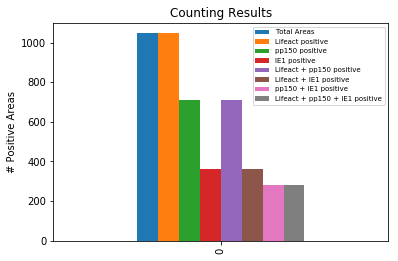

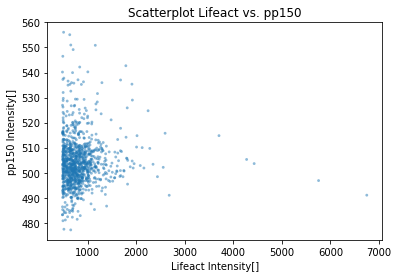

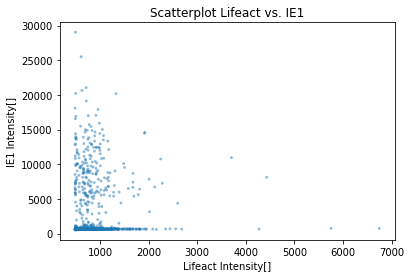

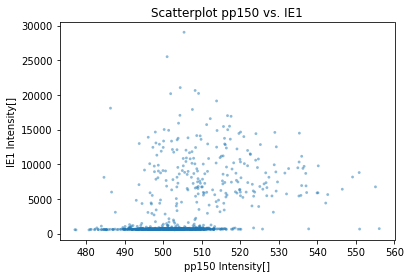

In [12]:
Countplot = Chcounter.plot(kind='bar')
Countplot.legend(loc=1, prop={'size': 7})
plt.title('Counting Results')
plt.ylabel('# Positive Areas')
figname=outputpath+'Counting Results'+'.png'
plt.savefig(figname,bbox_inches='tight', dpi=300)
plt.show(Countplot)
comb = combinations(range(len(frames)), 2)
for i in list(comb):
    x=frames[i[0]+1]['Mean']
    y=frames[i[1]+1]['Mean']
    Scatter = plt.scatter(x,y,s=8, alpha=0.5, edgecolors='none')
    plt.xlabel(Channelarray['Channel '+str(i[0]+1)]+' Intensity[]')
    plt.ylabel(Channelarray['Channel '+str(i[1]+1)]+' Intensity[]')
    plt.title('Scatterplot ' + Channelarray['Channel '+str(i[0]+1)]+' vs. '+\
              Channelarray['Channel '+str(i[1]+1)])
    figname=outputpath+'Scatterplot ' + Channelarray['Channel '+str(i[0]+1)]\
    +' vs. '+Channelarray['Channel '+str(i[1]+1)]+'.png'
    plt.savefig(figname,bbox_inches='tight', dpi=300)
    plt.show(Scatter)
